In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# Question 1

Si beta = 0, alors on va prendre une valeure suivante qui maximise V à chaque fois que "possible" (d'après l'algorithme). On ne trouvera alors surement pas de minimum ou difficilement.

Au contraire, si beta = 1, on ne va jamais changer de zone, donc on trouvera un minimum, mais pas forcément le minimum global. 

# Question 2

# Question 3

In [ ]:
k = 40
E = np.arange(1,k+1,1)

In [ ]:
def V(x):
    return np.cos(4*np.pi*x/k) - np.sqrt(4*np.pi * x / k)

In [ ]:
X = np.linspace(0,100, 1000)
Y = V(X)

In [ ]:
def algo(T, beta, X0):
    S = []
    t= 0
#     X = random.choice(E)
    X = X0
    while (t < T):
        next_ = chose_neighbour(X)
        if (V(next_) < V(X)):
            X = next_
        else:
            seuil = random.random()
            if (np.exp(beta * (V(X) - V(next_))) > seuil):
                X = next_
            else:
                X = X
        t +=1
        S.append(X)
    
    return S


def chose_neighbour(i):
    if (i ==1):
        return 2
    
    if (i ==k):
        return k-1
    else:
        value = random.choice([i - 1, i+1])
        return value

In [ ]:
res = algo(3000, 0.9, X0 = 15)
res =  [V(x) for x in res]

plt.plot(np.linspace(0,3000,3000), res)

# 2. Application au voyageur de commerce

# Question 4

In [9]:
def EchangerDeuxVilles(Coordonnees, i, j):
    min_ = min(i,j)
    max_ = max(i,j)
    L = []
    for k in range (len(Coordonnees)):
        if ((k !=i) and (k !=j)):
            L.append(Coordonnees[k])
        
        elif (k == min_):
            L.append(Coordonnees[max_])
            
        elif (k == max_):
            L.append(Coordonnees[min_])
            
    return L



In [7]:
def Longueur(Coordonnees):
    l = 0
    for i in range (len(Coordonnees) - 1):
        l += np.sqrt((Coordonnees[i+1][0] - Coordonnees[i][0]) ** 2 + (Coordonnees[i+1][1] - Coordonnees[i][1]) **2 )
        
    return l

# Question 5

In [2]:
Coordonnees_PaysMystere = pd.read_excel('PaysMystere.xls').values

In [ ]:
def Metropolis_Hastings(T, beta,  Coordonnees):
    S = []
    n = len(Coordonnees)
    t= 0
#     X = random.choice(E)
    Coordonnees_t = Coordonnees
    
    while (t < T):
        i,j = random.randint(0,n-1), random.randint(0,n-1)
        next_coordinates = EchangerDeuxVilles(Coordonnees_t, i,j)
        
        
        if (Longueur(next_coordinates) < Longueur(Coordonnees_t)):
            Coordonnees_t = next_coordinates
        
        else:
            seuil = random.random()
            if (np.exp(beta * (Longueur(Coordonnees_t) - Longueur(next_coordinates))) > seuil):
                Coordonnees_t = next_coordinates
            else:
                Coordonnees_t = Coordonnees_t 
        t +=1
        S.append(Coordonnees_t)
    
#     return Coordonnees_t
    return S
    

In [ ]:
result = Metropolis_Hastings(50000, 2, Coordonnees_PaysMystere)
length_through_time = [Longueur(x) for x in result]

plt.plot(np.linspace(0,50000,50000), length_through_time)


In [ ]:
plt.plot([x[0] for x in result[-1]], [x[1] for x in result[-1]])

In [ ]:
Longueur(result[-1])

# Le Voyageur de Commerce - Optimisation ? 

In [3]:
def get_max_distance_cities(Coordonnees):
    a, b = Coordonnees[0], Coordonnees[1]
    l = Longueur([a,b])
    k=0
    for i in range (len(Coordonnees) - 1):
        new_l = Longueur([Coordonnees[i], Coordonnees[i+1]])
        if  new_l > l:
            a,b = Coordonnees[i], Coordonnees[i+1]
            l = new_l
            k=i
    
    return k, k+1

In [ ]:
get_max_distance_cities([[0,0], [0,0], [0,0], [0,0], [0,1], [0,0]])

In [4]:
def Metropolis_Hastings_optim(T, beta,  Coordonnees):
    S = []
    n = len(Coordonnees)
    t= 0
#     X = random.choice(E)
    Coordonnees_t = Coordonnees
    
    while (t < T):
        i,j = get_max_distance_cities(Coordonnees_t)
        k = get_closest_city(Coordonnees_t, i)
        
        next_coordinates = EchangerDeuxVilles(Coordonnees_t, i,k)
        
        
        if (Longueur(next_coordinates) < Longueur(Coordonnees_t)):
            Coordonnees_t = next_coordinates
        
        else:
            seuil = random.random()
            if (np.exp(beta * (Longueur(Coordonnees_t) - Longueur(next_coordinates))) > seuil):
                Coordonnees_t = next_coordinates
            else:
                Coordonnees_t = Coordonnees_t 
        t +=1
        S.append(Coordonnees_t)
    
#     return Coordonnees_t
    return S
    

In [5]:
def get_closest_city(Coordonnees, i):
    city = Coordonnees[i]
    lmin = 0
    j = 0
    for k in range (len(Coordonnees)):
        if (k != i):
            l = Longueur([Coordonnees[i], Coordonnees[k]])
            if l < lmin:
                l = lmin
                j = k
                
    return k

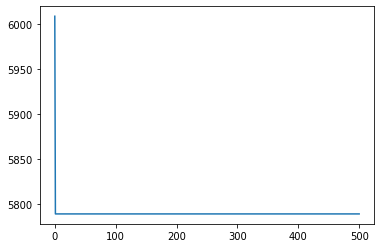

In [10]:
result_opt = Metropolis_Hastings_optim(500, 2, Coordonnees_PaysMystere)
length_through_time_optim = [Longueur(x) for x in result_opt]

plt.plot(np.linspace(0,500, 500), length_through_time_optim)

In [ ]:
plt.plot([x[0] for x in result[-1]], [x[1] for x in result_opt[-1]])

In [ ]:
length_through_time_optim